# Algorithm Hierarchical Clustering M

describe

In [402]:

from sklearn.metrics.pairwise import euclidean_distances
import numpy as np 

class HierarchicalClustering:
    
    def __init__(self, alpha = 1.01, max_iteration = 200, debug= False, delta=0., stop_neg_sum = True):
        ''' '''
        self.alpha = alpha
        self.max_iteration = max_iteration
        self.debug = debug
        self._c_all = []
        self.delta = delta
        self.stop_neg_sum = stop_neg_sum
    
    def score(sefl, x):
        ''' '''
    
    def _get_min(self, M, C):
        R = []
        for n in range(len(C)):
            if C[n][1] != 1:
                continue
            R.append(np.min(M[n][M[n]>0]))
        return min(R)    
            
    
    def fit(self, x):
        ''' '''
        self._c_all = []
        y_ = []
        M =  euclidean_distances(x,x)
        C = []
        size = len(M)
        for i in range(size):
            '''  (set clusters, is active, to join, distance) '''
            C.append([set([i]), 1, -1, 0]) 
        
        delta = self.delta
        
        for i in range(self.max_iteration):
            p_min = 100
             
            d = np.min(M[M > 0]) * self.alpha 
            #d = self._get_min(M, C)
            if d > delta:
                delta = d
            #delta = d    
            if(self.debug):  
                #print(M)
                print('delta: %.3f, d: %.3f' % (delta, d))    
            M_ = M - delta
            ''' join clusters '''
            join = False
            for i in range(size):  
                for j in range(i,size):  
                    if(M[i][j] <= 0 or M_[i][j] > 0): # old
                        continue
                    if i == j:
                        continue 
                    a = i
                    b = j
            
                    if C[i][2] != -1:
                        a = C[i][2]
                    if C[j][2] != -1: 
                        b = C[j][2]
                
                    if(a == b):
                        continue
            
                    # todo
                    if C[b][1] != 1 or C[a][1] != 1:
                        continue
            
                    C[a][0] = C[a][0].union(C[b][0])  
                    C[b][1] = C[b][1] - 1
                    C[b][2] = a 
                    C[a][1] = 1 
                    #M_[b,:] = 0 
                    #M_[:,b] = 0

                    #print(M_[b])
                    join = True
            #print('join', join)        
            if join == False:
                #break
                delta = delta * 2.
                continue
            ''' update matrix '''
            #delta = d
            M =   M_ 
                    
            if len(M[M > 0]) == 0:
                print('len(M[M > 0]) == 0')
                print(M_)
                break
              

            y_ = np.zeros(size)
            cl = 0
            for c in C:
                if(c[1] == 1): 
                    for i in c[0]:
                        y_[i] = cl
                    cl = cl + 1
                    
            self._c_all.append(y_)  
            print('unique len: %d' % len(np.unique(y_)))
            if len(np.unique(y_)) == 1:
                print('len(np.unique(y_)) == 1')
                break
            neg,pos = [],[]    
            for i in range(size): 
                for j in range(i,size):
                    if(M[i][j] <= 0):
                        neg.append(delta + np.abs(M[i][j]))
                    else:
                        pos.append(M[i][j])    
            if(self.debug):
                print('Sum pos: %.3f, sum neg: %.3f, Std pos: %.3f, Std neg: %.3f' % 
                      (sum(pos), sum(neg),np.std(pos), np.std(neg))) 
            if self.stop_neg_sum and sum(pos) < sum(neg): 
                print('sum(pos) < sum(neg)')
                break  
        return y_                
        
    def print_name(self):
        print('Hierarchical clustering')
        


In [403]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([
    [1,1],
    [1,2],
    [2,2],
    [2,1],
    
    #[4,4],
    
    [5,5], 
    [6,6],
    [6,7],
    
    [3.5,7],
    
    # 
    [3.6,7.1],
    [3.7,6.9],
    [3.8,6.9] 
]) 

def draw(x, y):
    k = 2
    U,s,vh = np.linalg.svd(x) 
    k = min(k, len(s))

    x1 = np.dot(U[:,0:k] * s[0:k], vh[0:k]) 

    plt.rcParams["figure.figsize"] = (12,12)
    plt.scatter(x1[:,0], x1[:,1], c=y)

   

Hierarchical clustering
delta: 0.100, d: 0.100
unique len: 10
Sum pos: 204.829, sum neg: 2.300, Std pos: 2.352, Std neg: 0.028
delta: 0.100, d: 0.041
unique len: 9
Sum pos: 199.488, sum neg: 3.659, Std pos: 2.317, Std neg: 0.044
delta: 0.100, d: 0.024
unique len: 8
Sum pos: 194.358, sum neg: 5.429, Std pos: 2.193, Std neg: 0.097
delta: 0.100, d: 0.016
delta: 0.200, d: 0.016
delta: 0.400, d: 0.016
delta: 0.800, d: 0.016
unique len: 4
Sum pos: 155.642, sum neg: 35.512, Std pos: 1.941, Std neg: 0.400
delta: 0.800, d: 0.314
unique len: 3
Sum pos: 121.899, sum neg: 56.970, Std pos: 1.797, Std neg: 0.524
delta: 0.800, d: 0.302
unique len: 2
Sum pos: 92.804, sum neg: 91.074, Std pos: 0.780, Std neg: 1.041
delta: 1.543, d: 1.543
unique len: 1
len(np.unique(y_)) == 1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


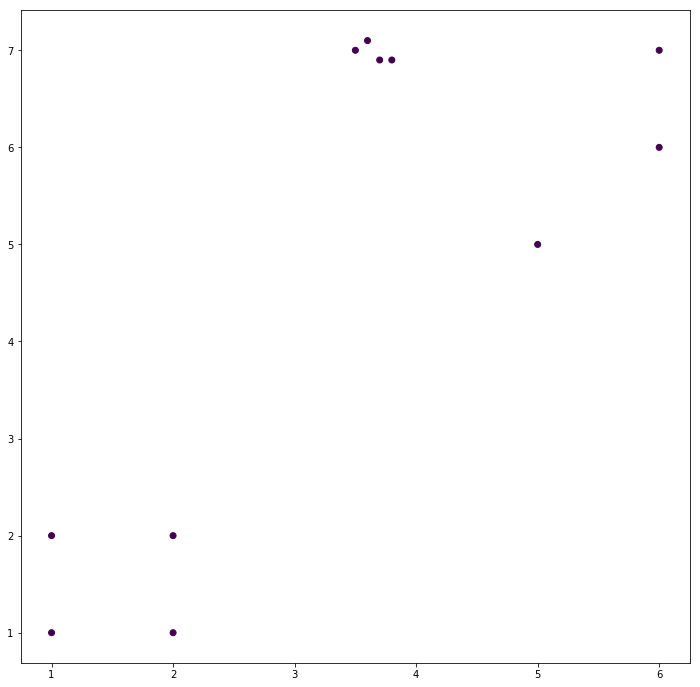

In [404]:
#x = x[5:10,:]
hc = HierarchicalClustering(alpha = 1., debug=True)
hc.print_name()
Y_ = hc.fit(x)
print(Y_)
draw(x, Y_)

[0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]


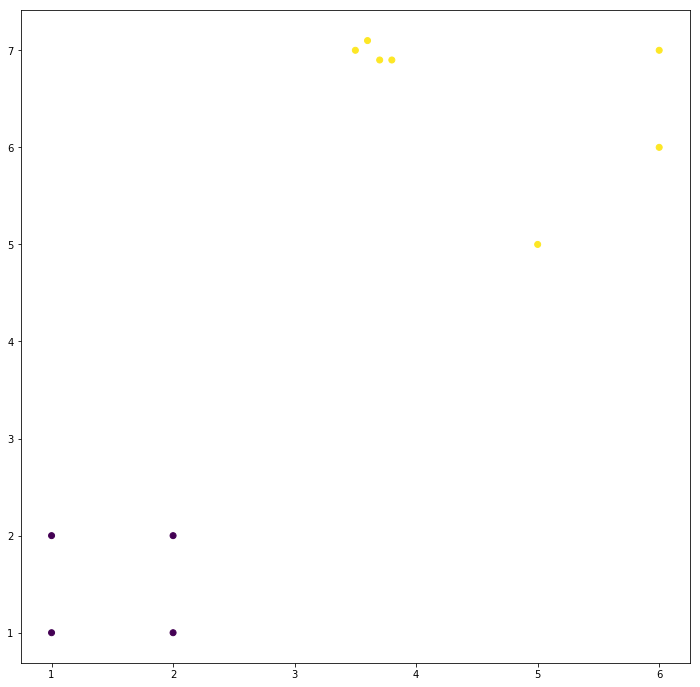

In [405]:
n = -2
print(hc._c_all[n])
draw(x, hc._c_all[n])

delta: 0.000, d: 0.000
unique len: 148
Sum pos: 28426.619, sum neg: 0.000, Std pos: 1.633, Std neg: 0.000
delta: 0.140, d: 0.140
unique len: 144
Sum pos: 26862.842, sum neg: 43.840, Std pos: 1.633, Std neg: 0.016
delta: 0.140, d: 0.002
unique len: 75
Sum pos: 25309.313, sum neg: 96.249, Std pos: 1.621, Std neg: 0.110
delta: 0.140, d: 0.004
unique len: 33
Sum pos: 23788.001, sum neg: 204.253, Std pos: 1.599, Std neg: 0.148
delta: 0.140, d: 0.006
unique len: 16
Sum pos: 22324.499, sum neg: 403.389, Std pos: 1.559, Std neg: 0.174
delta: 0.140, d: 0.008
unique len: 13
Sum pos: 20934.645, sum neg: 663.852, Std pos: 1.523, Std neg: 0.193
delta: 0.140, d: 0.000
unique len: 6
Sum pos: 19618.745, sum neg: 1014.370, Std pos: 1.474, Std neg: 0.223
delta: 0.140, d: 0.004
unique len: 4
Sum pos: 18378.451, sum neg: 1430.693, Std pos: 1.424, Std neg: 0.252
delta: 0.140, d: 0.007
delta: 0.280, d: 0.007
unique len: 3
Sum pos: 16102.988, sum neg: 2971.764, Std pos: 1.313, Std neg: 0.319
delta: 0.280, d:

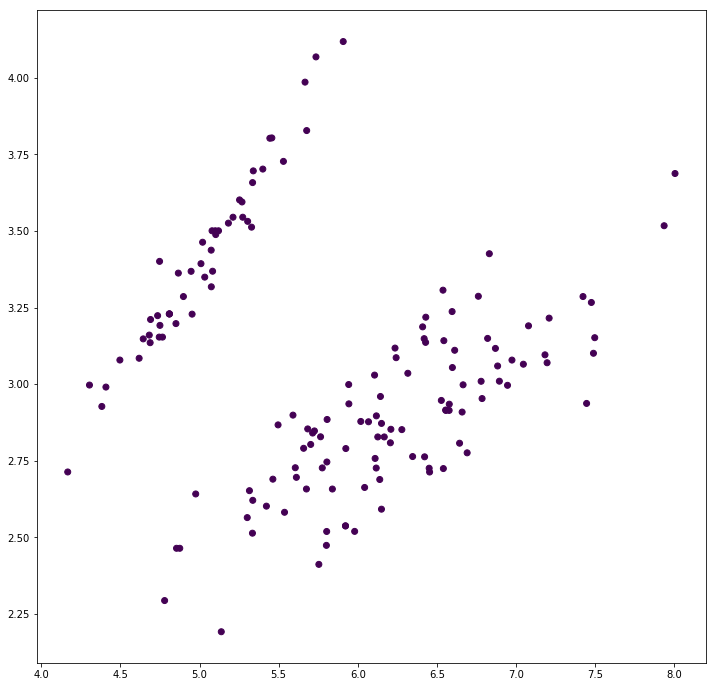

In [406]:
data = load_iris()
ix = data.data
iy = data.target
cl = HierarchicalClustering(alpha=1.4, debug=1, max_iteration=100)
iiy = cl.fit(ix)
draw(ix,iiy)

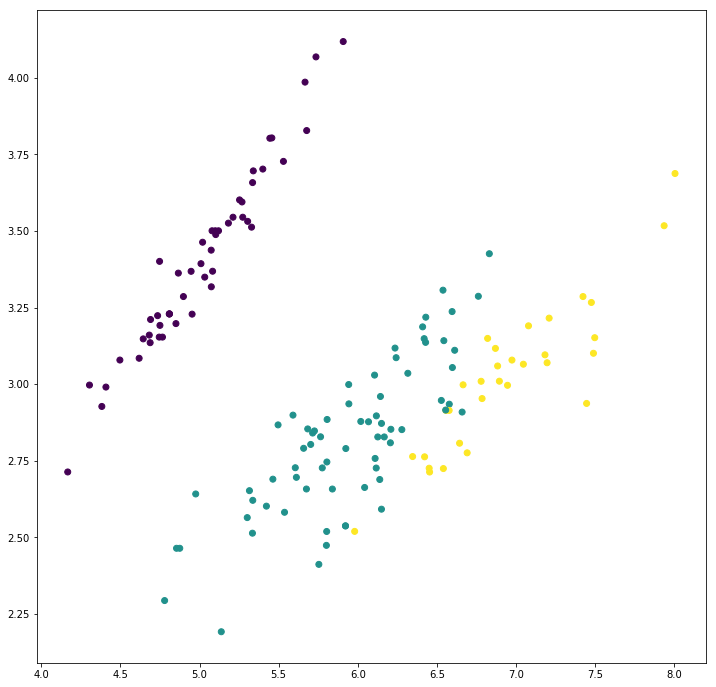

In [407]:
draw(ix,cl._c_all[-3])

delta: 0.001, d: 0.001
unique len: 999
Sum pos: 618053.152, sum neg: 1.204, Std pos: 0.682, Std neg: 0.000
delta: 0.001, d: 0.001
unique len: 998
Sum pos: 617648.661, sum neg: 2.224, Std pos: 0.682, Std neg: 0.000
delta: 0.001, d: 0.000
unique len: 995
Sum pos: 617244.171, sum neg: 3.038, Std pos: 0.682, Std neg: 0.000
delta: 0.001, d: 0.000
unique len: 987
Sum pos: 616839.686, sum neg: 3.861, Std pos: 0.682, Std neg: 0.000
delta: 0.001, d: 0.000
unique len: 985
Sum pos: 616435.205, sum neg: 4.684, Std pos: 0.682, Std neg: 0.000
delta: 0.001, d: 0.000
unique len: 977
Sum pos: 616030.730, sum neg: 5.516, Std pos: 0.682, Std neg: 0.000
delta: 0.001, d: 0.000
unique len: 964
Sum pos: 615626.260, sum neg: 6.359, Std pos: 0.682, Std neg: 0.001
delta: 0.001, d: 0.000
unique len: 956
Sum pos: 615221.800, sum neg: 7.206, Std pos: 0.682, Std neg: 0.001
delta: 0.001, d: 0.000
unique len: 934
Sum pos: 614817.352, sum neg: 8.079, Std pos: 0.682, Std neg: 0.001
delta: 0.001, d: 0.000
unique len: 91

Sum pos: 579027.035, sum neg: 343.117, Std pos: 0.672, Std neg: 0.024
delta: 0.006, d: 0.000
unique len: 48
Sum pos: 575842.321, sum neg: 407.669, Std pos: 0.670, Std neg: 0.026
delta: 0.006, d: 0.000
unique len: 47
Sum pos: 572664.565, sum neg: 479.238, Std pos: 0.669, Std neg: 0.027
delta: 0.006, d: 0.000
unique len: 40
Sum pos: 569494.028, sum neg: 558.467, Std pos: 0.667, Std neg: 0.029
delta: 0.006, d: 0.000
unique len: 33
Sum pos: 566330.840, sum neg: 644.953, Std pos: 0.666, Std neg: 0.030
delta: 0.006, d: 0.000
unique len: 30
Sum pos: 563174.817, sum neg: 738.676, Std pos: 0.664, Std neg: 0.032
delta: 0.006, d: 0.000
unique len: 29
Sum pos: 560026.199, sum neg: 839.746, Std pos: 0.662, Std neg: 0.033
delta: 0.006, d: 0.000
unique len: 27
Sum pos: 556884.784, sum neg: 948.058, Std pos: 0.661, Std neg: 0.035
delta: 0.006, d: 0.000
unique len: 26
Sum pos: 553750.834, sum neg: 1064.055, Std pos: 0.659, Std neg: 0.036
delta: 0.006, d: 0.000
unique len: 25
Sum pos: 550624.220, sum ne

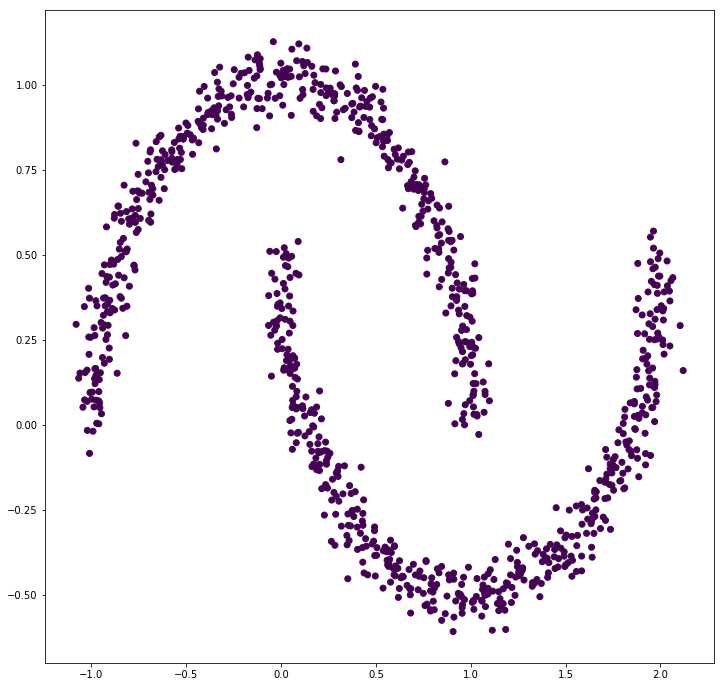

In [415]:
# noisy_moons
from sklearn import cluster, datasets, mixture
mx,my =  datasets.make_moons(n_samples=1000, noise=.05)

cl2 = HierarchicalClustering(alpha=1., debug=1)
mmy = cl2.fit(mx)
draw(mx,mmy)

[0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.

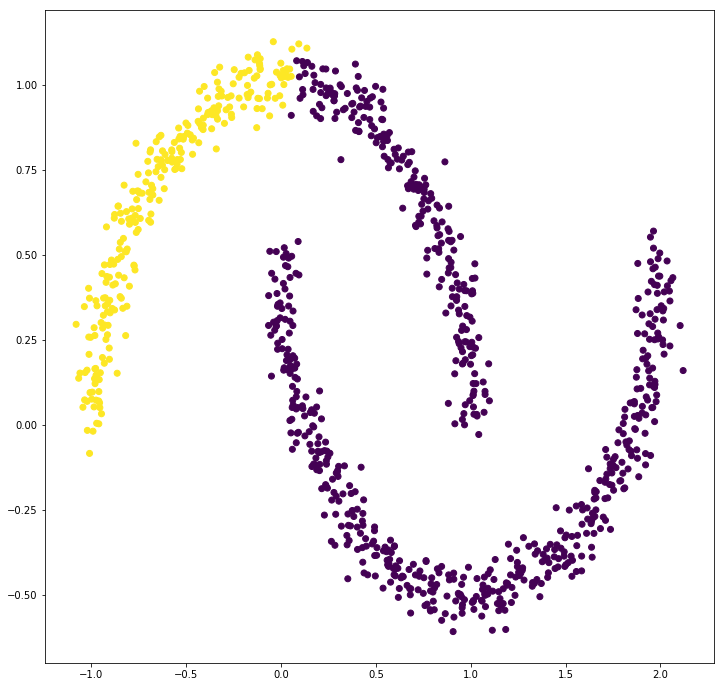

In [416]:
n = -2
print(cl2._c_all[n])
draw(mx,cl2._c_all[n])

delta: 0.500, d: 0.421
unique len: 66
Sum pos: 5432611.941, sum neg: 7562.402, Std pos: 8.319, Std neg: 0.148
delta: 0.500, d: 0.001
unique len: 20
Sum pos: 5193851.370, sum neg: 32258.831, Std pos: 8.130, Std neg: 0.257
delta: 0.500, d: 0.000
unique len: 9
Sum pos: 4970706.302, sum neg: 76602.763, Std pos: 7.809, Std neg: 0.374
delta: 0.500, d: 0.000
unique len: 6
Sum pos: 4764888.704, sum neg: 137817.165, Std pos: 7.368, Std neg: 0.496
delta: 0.500, d: 0.002
unique len: 5
Sum pos: 4574200.199, sum neg: 210529.159, Std pos: 6.891, Std neg: 0.613
delta: 0.500, d: 0.004
unique len: 3
Sum pos: 4394580.280, sum neg: 290041.240, Std pos: 6.482, Std neg: 0.720
delta: 0.500, d: 0.010
delta: 1.000, d: 0.010
delta: 2.000, d: 0.010
delta: 4.000, d: 0.010
delta: 8.000, d: 0.010
unique len: 2
Sum pos: 1964435.608, sum neg: 3961401.069, Std pos: 3.809, Std neg: 3.506
sum(pos) < sum(neg)


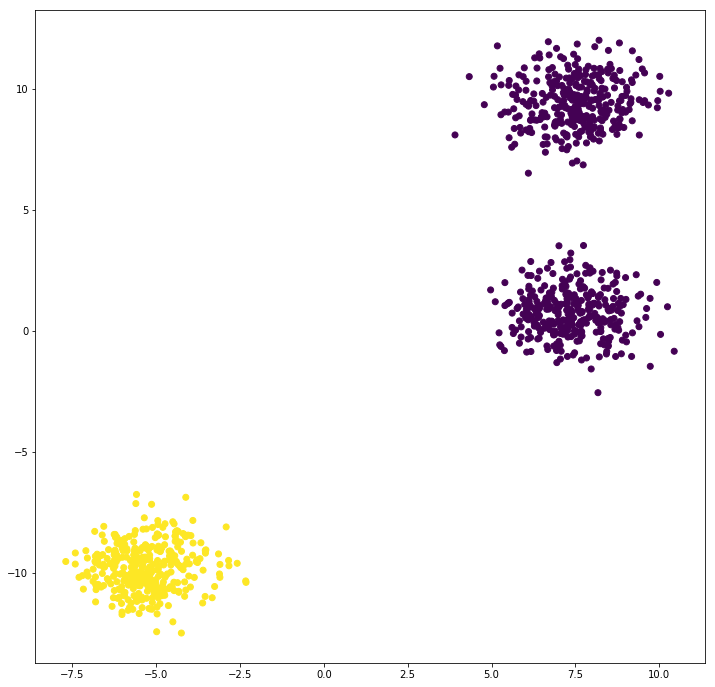

In [410]:
bx,_ =  datasets.make_blobs(n_samples=1000, random_state=8) 

cl3 = HierarchicalClustering(alpha=100., debug=1,max_iteration=100,delta=.5)
by = cl3.fit(bx)
draw(bx,by)

[0. 1. 2.]


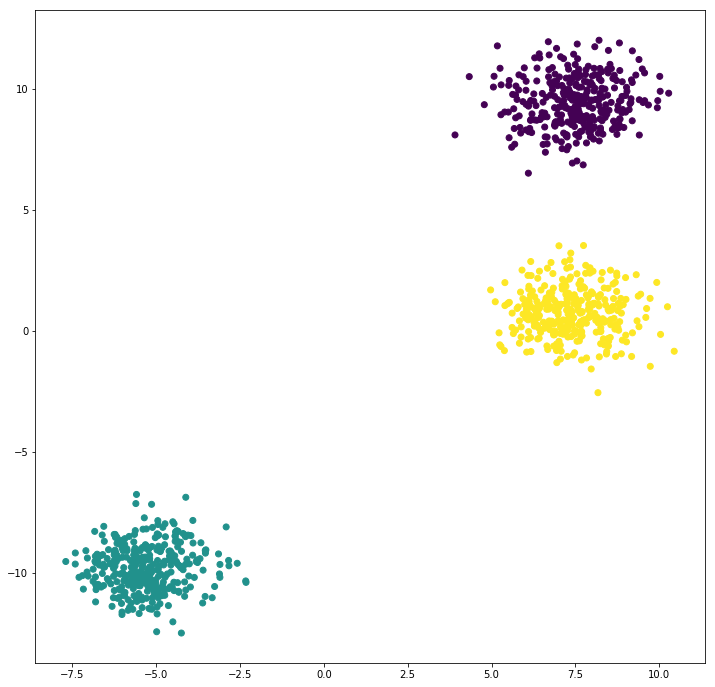

In [412]:
n = -2
#print(cl3._c_all[n])
print(np.unique(cl3._c_all[n]))
draw(bx,cl3._c_all[n])